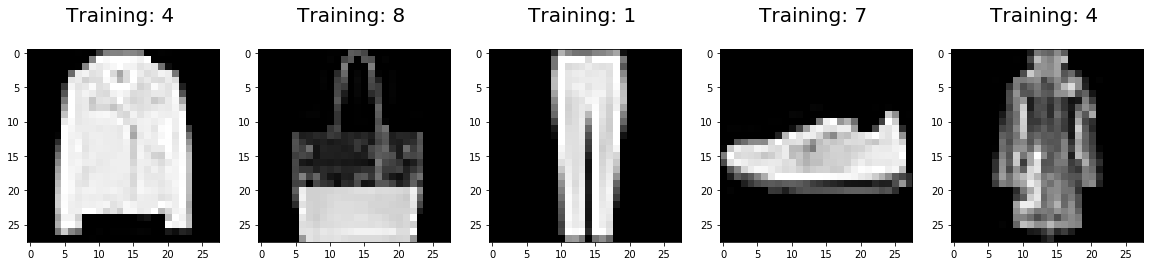

In [1]:
# load the data
from sklearn.datasets import fetch_openml
mnist=fetch_openml(name="Fashion-MNIST")
from sklearn.model_selection import train_test_split
train_img, test_img, train_lbl, test_lbl = train_test_split(
 mnist.data, mnist.target, test_size=1/7.0, random_state=0)
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(train_img[0:5], train_lbl[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.title('Training: %s \n' % label, fontsize = 20)

In [2]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

In [3]:
RF.fit(train_img, train_lbl)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [4]:
##Predict the labels of new data
predictions = RF.predict(test_img)

In [8]:
acc = RF.score(test_img, test_lbl)
print(acc)

0.878


In [9]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(estimator = RF, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [10]:
best_clf = clf.fit(train_img,train_lbl )

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 35.9min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 65.2min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 107.7min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed: 142.2min finished


In [11]:
best_clf.best_estimator_


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=90, max_features=3,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [12]:
best_clf.score(test_img,test_lbl)

0.9694333333333334